<a href="https://colab.research.google.com/github/ramkumar997/Data_Science/blob/main/Numpy/Numpy-4_Misc_Topics_Complete_RevisionNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content
- **Use Case: Image Manipulation using Numpy**
- **Array splitting and Merging**
    - Splitting arrays - `split()`, `hsplit()`, `vsplit()`
    - Merging Arrays - `hstack()`, `vstack()`, `concatenate()`






- **Dimension Expansion and Reduction**
    - `np.expand_dims()`
    - `np.newaxis`
    - `np.sqeeze()`
    








## Use Case: Image Manipulation using Numpy

- By now, you already have an idea that Numpy is an amazing open-source Python library for **data manipulation** and **scientific computing**.


- It is used in the domain of **linear algebra**, Fourier transforms, **matrices**, and the **data science field**.


- **NumPy arrays are way faster than Python Lists**.


#### Do you know Numpy can also be used for Image Processing?

- The fundamental idea is that we know **images are made up of Numpy `ndarrays`**.


- So we can **manipulate these arrays and play with images**.


- This use case is to give you a broad overview of **Numpy for Image Processing.**

#### Make sure the required libraries are imported

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Now, we'll see how we can play with images using Numpy

## Opening an Image

- Well, to play with an image, we first need to open it

#### But, How can we open an image in our code?

- To open an image, we will use the `matplotlib` library to read and show images.


- We will cover all the functionalities of `matplotlib` in detail in visualization lecture.


- For this use case, just know that it uses an image module for working with images.


- It offers two useful methods **`imread()` and `imshow()`**.


**`imread()` – to read the images**

**`imshow()` – to display the images**


#### Now, Let's go ahead and load our image

#### Drive link for the image:

Download the image `fruits.jpg` from here: https://drive.google.com/file/d/1lHPQUi3wdB6HxN-SNJSBQXK7Z0y0wf32/view?usp=sharing

and place it in your current working directory

#### Let's download the images first

In [ ]:
#fruits image
!gdown 17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd

Downloading...
From: https://drive.google.com/uc?id=17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd
To: /content/fruits.png
100% 4.71M/4.71M [00:00<00:00, 153MB/s]


In [ ]:
#emma stone image
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI

Downloading...
From: https://drive.google.com/uc?id=1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI
To: /content/emma_stone.jpeg
100% 80.3k/80.3k [00:00<00:00, 65.4MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

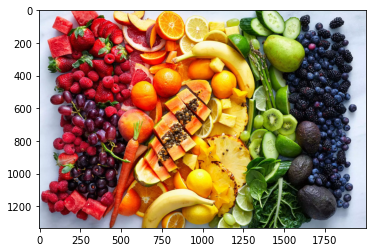

In [ ]:
img = plt.imread('fruits.png')
plt.imshow(img)

### Details of an Image
#### What do you think are the dimensions and shape of this image?

We will see what is the **dimension and shape of this image**, using the **`Image.ndim`** and **`Image.shape`** properties.

In [ ]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image

# of dims:  3
Img shape:  (1333, 2000, 3)


#### How come our 2-D image has 3 dimensions?

- **Coloured images have a 3rd dimension for depth or RGB colour channel**


- Here, the **depth is 3**


- But we will come to what RGB colour channels are in a bit


#### First, Let's understand something peculiar happening here with the `shape` of image

#### Do you see something different happening here when we check the `shape` of image?

- When we discussed **3-D Arrays**, we saw that **depth was the first element of the `shape` tuple**


- But when we are loading an image using **matplotlib and getting its 3-D array**, we see that **depth is the last element of the `shape` tuple**


#### Why is there a difference b/w normal np array and the np array generated from Matplotlib in terms of where the depth part of `shape` appears?

- This is how `matplotlib` reads the image


- It **reads the depth values (R, G and B values) of each pixel one by one** and stacks them one after the other


#### The shape of imge we read is:  (1333, 2000, 3)

- `matplotlib` **first reads that each plane has $1333\times2000$ pixels**


- Then, it **reads depth values (R, G and B values) of each pixel and place the values in 3 separate planes**


- That is why **depth is the last element of `shape` tuple in np array generated from an image read by `matplotlib`**


- Whereas in a **normal np array, depth is the first element of `shape` tuple**


#### Now, What are these RGB channels and How can we visualize them?

## Visualizing RGB Channels
We can split the image into each RGB color channels using only Numpy

#### But, What exactly RGB values are?

- These are values of each pixel of an image


- Each pixel is made up of **3 components/channels** - **Red, Green, Blue** - which form RGB values


- Coloured images are usually stored as 3-dimensional arrays of **8-bit unsigned integers**


- So, the range of values that each channel of a pixel can take is $0$ to $2^8 - 1$


- That is, each pixel's each channel, R, G and B can range from **0 to 255**


#### Each pixel has these 3 values which combined together forms the colour that the pixel represents

- So, a pixel **[255, 0, 0 ]** will be **RED** in colour

- A pixel **[0, 255, 0]** will be **GREEN** in colour

- A pixel **[0, 0, 255]** will be **BLUE** in colour


#### Question: What will be the colour of pixel [0, 0, 0]?

- Black


#### Question: What will be the colour of pixel [255, 255, 255]?

- White


#### Now, Let's separate the R, G, B channels in our image:

- We'll make use of **slicing of arrays**

- For **RED** channel, we'll **set values of GREEN and BLUE to 0**



In [ ]:
img = np.array(plt.imread('fruits.png'))

img_R = img.copy()

img_R[:, :, (1, 2)] = 0


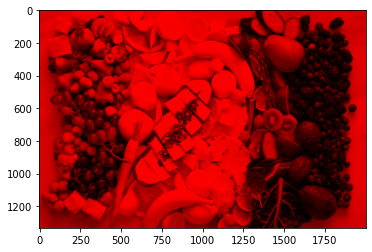

In [ ]:
plt.imshow(img_R)

Similarly, for GREEN channel, we'll set values of RED and BLUE to 0

... and same for BLUE channel

### Rotating an Image (Transpose the Numpy Array)

#### Now, What if we want to rotate the image?

- Remember **image is a Numpy array**


- **Rotating the image means transposing the array**


#### For this, we'll use the `np.transpose()` function in numpy

#### Now, Let's understand `np.transpose()` function first

- It takes 2 arguments


**1st argument** is obviously the **array that we want to transpose (image array in our case)**


**2nd argument is `axes`**
- Its a **tuple or list of ints**

- It contains a **permutation of [0,1,..,N-1] where N is the number of axes of array**

#### Now, our image array has 3 axes (3 dimensions) ---> 0th, 1st and 2nd

- We specify how we want to transpose the array by giving an **order of these axes inside the tuple**

    - **Vertical axis (Row axis) is 0th axis**
    - **Horizontal axis (Column axis) is 1st axis**
    - **Depth axis is 2nd axis**


- **In order to rotate the image, we want to transpose the array**


- That is, we want to **transpose rows into columns and columns into rows**


- So, we want to **interchange the order of row and column axis** ---> **interchange order of 0th and 1st axis**


- We **don't want to change the depth axis (2nd axis)** ---> So, it will **remain at its original order position**


Now, the **order of axes in orginal image is `(0, 1, 2)`**

#### What will be the order of axes rotated image or transposed array?

- The **order of axes in rotated image will be `(1, 0, 2)`**


- **Order (Position) of 0th and 1st column is interchanged**


#### Let's see it in action:

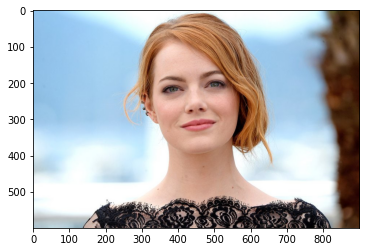

In [ ]:
img = np.array(plt.imread('emma_stone.jpeg'))
plt.imshow(img)

In [ ]:
img.shape

(600, 900, 3)

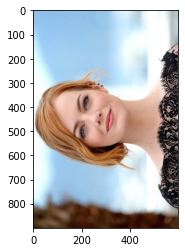

In [ ]:
img_rotated = np.transpose(img, (1,0,2))
plt.imshow(img_rotated)

#### As you can see:

- We obtained the **rotated image by transposing the np array**

### Trim Image

#### Now, How can we crop an image using Numpy?

- Remember! Image is a numpy array of pixels

- So, We can trim/crop an image in Numpy using Array using **Slicing**.


#### Let's first see the original image

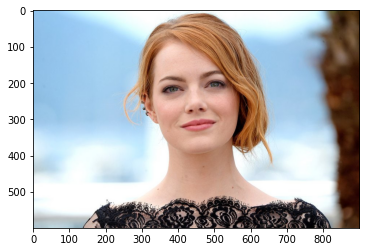

In [ ]:
img = np.array(plt.imread('./emma_stone.jpeg'))

plt.imshow(img)

#### Now, Let's crop the image to get the face only

- If you see x and y axis, the face starts somewhat from ~200 and ends at ~700 on x-axis
    - **x-axis in image is column axis in np array**
    - Columns change along x-axis


- And it lies between ~100 to ~500 on y-axis
    - **y-axis in image is row axis in np array**
    - Rows change along y-axis


#### We'll use this information to slice our image array

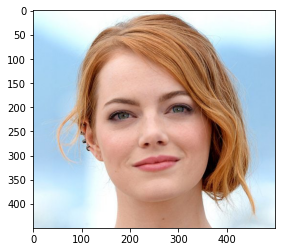

In [ ]:
img_crop = img[0:450, 200:700, :]
plt.imshow(img_crop)

## Saving Image as `ndarray`

#### Now, How can we save `ndarray` as Image?

To save a `ndarray` as an image, we can use `matplotlib`'s `plt.imsave()` method.


- **1st agrument** ---> We provide the path and name of file we want to save the image as


- **2nd agrument** ---> We provide the image we want to save


#### Let's save the cropped face image we obtained previously

In [ ]:
path = 'emma_face.jpg'
plt.imsave(path, img_rotated)

#### Now, if you go and check your current working directory, image would have been saved by the name `emma_face.jpg`

## Array Splitting and Merging



- In addition to reshaping and selecting subarrays, it is often necessary to split arrays into smaller arrays or  merge arrays into bigger arrays,


- **For example**, when joining separately computed or measured data series into a **higher-dimensional array**, such as a matrix.


### Splitting
#### `np.split()`

- Splits an array into multiple sub-arrays as views


#### It takes an argument `indices_or_sections`

- If `indices_or_sections` is an **integer, n**, the array will be **divided into n equal arrays along axis**.

- If such a split is not possible, an error is raised.

- If `indices_or_sections` is a **1-D array of sorted integers**, the entries indicate **where along axis the array is split**.

- If an index **exceeds the dimension of the array along axis**, an **empty sub-array is returned** correspondingly.

In [ ]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.split(x, 3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [ ]:
np.split(x, [3, 5, 6])

[array([0, 1, 2]), array([3, 4]), array([5]), array([6, 7, 8])]

#### `np.hsplit()`

- Splits an array into multiple sub-arrays **horizontally (column-wise)**.

In [ ]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

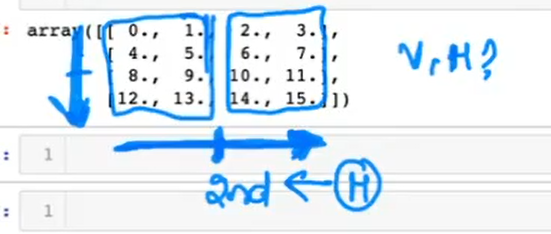

#### Think of it this way:

- There are 2 axis to a 2-D array
    1. **1st axis - Vertical axis**
    2. **2nd axis - Horizontal axis**

#### Along which axis are we splitting the array?

- The split we want happens across the **2nd axis (Horizontal axis)**


- That is why we use `hsplit()`


#### So, try to think in terms of "whether the operation is happening along vertical axis or horizontal axis"

- We are splitting the horizontal axis in this case

In [ ]:
np.hsplit(x, 2)

[array([[ 0.,  1.],
        [ 4.,  5.],
        [ 8.,  9.],
        [12., 13.]]), array([[ 2.,  3.],
        [ 6.,  7.],
        [10., 11.],
        [14., 15.]])]

In [ ]:
np.hsplit(x, np.array([3, 6]))

[array([[ 0.,  1.,  2.],
        [ 4.,  5.,  6.],
        [ 8.,  9., 10.],
        [12., 13., 14.]]), array([[ 3.],
        [ 7.],
        [11.],
        [15.]]), array([], shape=(4, 0), dtype=float64)]

#### `np.vsplit()`

- Splits an array into multiple sub-arrays **vertically (row-wise)**.

In [ ]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

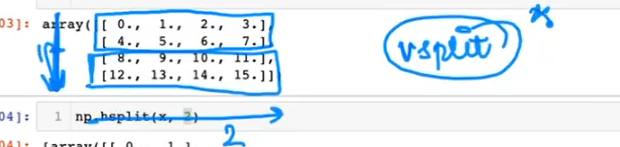

#### Now, along which axis are we splitting the array?

- The split we want happens across the **1st axis (Vertical axis)**


- That is why we use `vsplit()`


#### Again, always try to think in terms of "whether the operation is happening along vertical axis or horizontal axis"

- We are splitting the vertical axis in this case

In [ ]:
np.vsplit(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]), array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [ ]:
np.vsplit(x, np.array([3]))

[array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]), array([[12., 13., 14., 15.]])]

### Stacking
#### Let's say we have an array and we want to stack it like this:



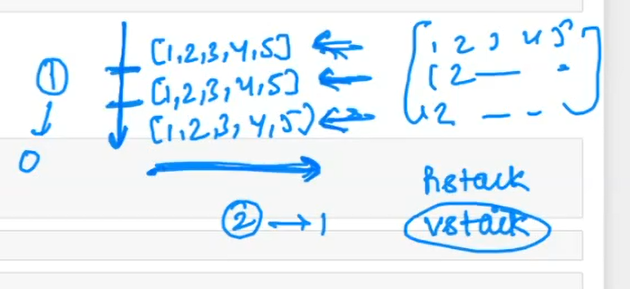

#### Will we use `vstack()` or `hstack()`?

#### Along which axis the operation is happening?

- Vertical axis

- So, we'll use `vstack()`

#### `np.vstack()`

- Stacks a list of arrays **vertically (along axis 0 or 1st axis)**


- For **example**, **given a list of row vectors, appends the rows to form a matrix**.

In [ ]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [ ]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Now, What if we want to stack the array like this?

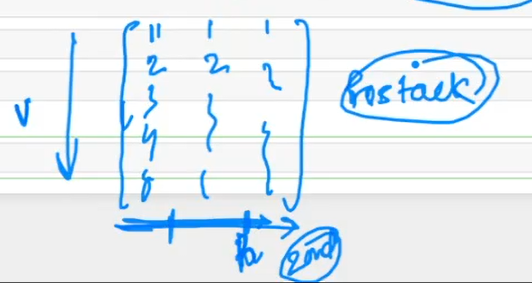

- Operation or **change is happening along horizontal axis**

- So, we'll use `hstack()`

#### `np.hstack()`

- Stacks a list of arrays horizontally (along axis 1)

- For **example**, **given a list of column vectors, appends the columns to form a matrix**.

In [ ]:
data = np.arange(5).reshape(5,1)
data

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [ ]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

#### Now, Let's look at a more generalized way of stacking arrays

### `np.concatenate()`

- Creates a new array by appending arrays after each other, along a given axis

- Provides similar functionality, but it takes a **keyword argument `axis`** that specifies the **axis along which the arrays are to be concatenated**.

#### Input array to `concatenate()` needs to be of dimensions atleast equal to the dimensions of output array

In [ ]:
z = np.array([[2, 4]])
z

array([[2, 4]])

In [ ]:
z.ndim

2

In [ ]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [ ]:
zz = np.concatenate([z, z], axis=1)
zz

array([[2, 4, 2, 4]])

#### Let's look at a few more examples using `np.concatenate()`

#### Question: What will be the output of this?
```
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
```

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### Now, How did it work?

- Dimensions of `a` is $2\times2$

#### What is the dimensions of `b` ?

- 1-D array ?? - **NO**

- Look carefully!!

- **`b` is a 2-D array of dimensions $1\times2$**

#### `axis = 0` ---> It's a vertical axis

- So, **changes will happen along vertical axis**

- So, **`b` gets concatenated below `a`**

#### Now, What if we do NOT provide an axis along which to concatenate?



In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

#### Can you see what happened here?

- When we **don't specify the axis (`axis=None`)**, `np.concatenate()` **flattens the arrays and concatenates them as 1-D row array**

## Dimension Expansion and Reducion

Recall that we learnt how to convert 1D array to 2D array in previous lectures

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(6)
arr

array([0, 1, 2, 3, 4, 5])

In [ ]:
arr.shape

(6,)

In [ ]:
arr = arr.reshape(1,-1)

In [ ]:
arr.shape

(1, 6)

This is also know as expanding dimensions

i.e. we expanded our dimension from 1D to 2D

We can also perform same operation using `np.newaxis()`

#### `np.expand_dims()`

- Expands the shape of an array with axis of length 1.
- Insert a new axis that will appear at the axis position in the expanded array shape.



Function signature: `np.exapnd_dims(arr, axis)`

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html#numpy.expand_dims



In [ ]:
arr

array([0, 1, 2, 3, 4, 5])

Let's check the shape of arr

In [ ]:
arr.shape

(6,)

Let's expand the dimensions

In [ ]:
arr1 = np.expand_dims(arr, axis = 0 )
arr1

array([[0, 1, 2, 3, 4, 5]])

In [ ]:
arr1.shape

(1, 6)

#### What happened here?


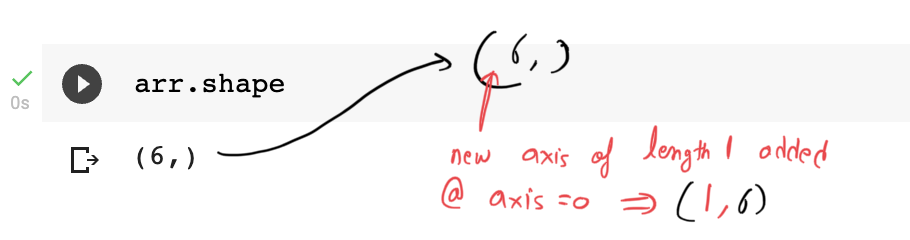

Here, the shape of array is (6,)

- We only have one axis i.e. axis = 0.

When we expand dimension with `axis =0`,
- it add 1 to dimension @ axis = 0
- Shape becomes (1, 6) from (6,)
- i.e. 1 is padded at the given axis location

Let's expand dims @ axis = 1

In [ ]:
arr2 = np.expand_dims(arr, axis = 1)
arr2

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
arr2.shape

(6, 1)

Notice that,
- as we provided `axis =1` in argument,
- It expanded the shape along axis =1 i.e 1 was appened @ axis 1.
- Hence, shape become (6,1) from (6,)

We can also do same thing using `np.newaxis`

#### `np.newaxis`

- passed as a parameter to the array.

Let's see how it works

In [ ]:
arr = np.arange(6)

In [ ]:
arr[np.newaxis, :] #equivalent to np.expand_dims(arr, axis =0)

array([[0, 1, 2, 3, 4, 5]])

We basically passed `np.newaxis` at the axis position where we want to add an axis

- In `arr[np.newaxis, : ]`,
    - we passed it @ axis =0, hence shape 1 was added @ axis = 0
    - and therefore, shape became (1, 6)

In [ ]:
arr[:, np.newaxis] # equivalent to np.expand_dims(arr, axis = 1 )

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

#### What if we want to reduce the number of dimensions?

We can use `np.squeeze` for reducing the dimensions

#### `np.sqeeze()`

- It removes the axis of length 1 from array.
- Inverse of `expand_dims`

Function signature: `np.squeeze(arr, axis)`

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

In [ ]:
arr = np.arange(9).reshape(1,1,9)
arr

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8]]])

In [ ]:
arr.shape

(1, 1, 9)

In [ ]:
arr1 = np.squeeze(arr)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
arr1.shape

(9,)

Notice that
- it reduced the shape from (1,1,9) to (9,)
- it did so by removing the axis of length 1
- i.e. it removed axis 0 and 1.

We can also remove specific axis using the `axis` argument

In [ ]:
arr

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8]]])

In [ ]:
arr.shape

(1, 1, 9)

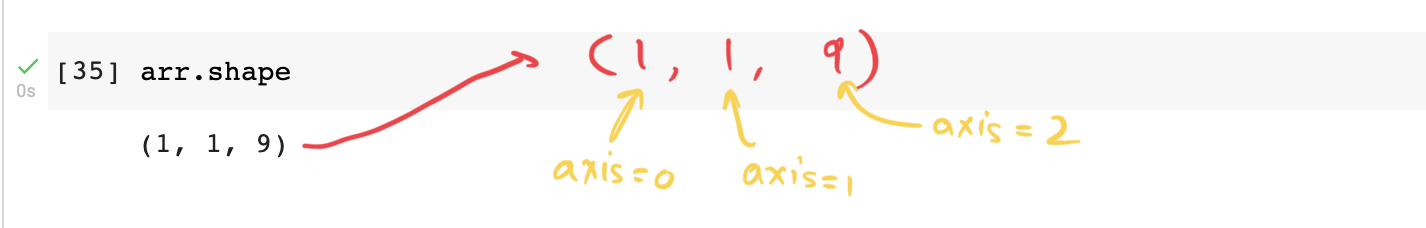

Let's remove axis = 1

In [ ]:
arr1 = np.squeeze(arr, axis = 1 )
arr1

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [ ]:
arr1.shape

(1, 9)

#### What if we try to remove 2nd axis?

In [ ]:
np.squeeze(arr, axis = 2 )

ValueError: ignored

It'll throw an array
- as we are trying to remove non- one length axis